# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt

%matplotlib inline

df_sat = pd.read_csv('../data/sat.csv')
df_act = pd.read_csv('../data/act.csv')



##### 2. Print the first ten rows of each dataframe.

In [35]:
df_sat

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [36]:
df_sat['Math'] = df_sat['Math'].replace({52: 524})
df_act['Science'] = df_act['Science'].replace({2.3:23.8})

In [38]:
del df_sat["Unnamed: 0"]
del df_act["Unnamed: 0"]

##### 3. Describe in words what each variable (column) is.

In [40]:
df_sat.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

SAT: Unnamed is an index, State is the location, Participation is the percent of students that took the SAT in the corresponding state., and the last three columns are average scores for the corresponding sections of the test.

In [41]:
df_act.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

ACT: Unammed is an index, State is the location, Participation is the percent of students that took ACT in their corresponding state. There are three columns for the average scores of each section. The last column is the average composite score.


##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [42]:
df_sat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [43]:
df_sat.shape

(51, 5)

In [44]:
df_act.shape

(52, 7)

In [45]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


##### 5. Print the types of each column.

In [46]:
df_sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [47]:
df_sat['Participation'] = df_sat.Participation.str.rstrip('%').astype('float') / 100
df_act['Participation'] = df_act.Participation.str.rstrip('%').astype('float') / 100

In [49]:
df_sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [50]:
df_act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

Yes, participation needs to be a float.

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [51]:
sat_state_math = df_sat.set_index('State')["Math"].to_dict()
sat_state_writing = df_sat.set_index('State')["Evidence-Based Reading and Writing"].to_dict()
sat_state_total = df_sat.set_index("State")["Total"].to_dict()

print(sat_state_math)
print(sat_state_writing)
print(sat_state_total)


{'Alabama': 572, 'Alaska': 533, 'Arizona': 553, 'Arkansas': 594, 'California': 524, 'Colorado': 595, 'Connecticut': 512, 'Delaware': 492, 'District of Columbia': 468, 'Florida': 497, 'Georgia': 515, 'Hawaii': 541, 'Idaho': 493, 'Illinois': 556, 'Indiana': 532, 'Iowa': 635, 'Kansas': 628, 'Kentucky': 616, 'Louisiana': 586, 'Maine': 499, 'Maryland': 524, 'Massachusetts': 551, 'Michigan': 495, 'Minnesota': 651, 'Mississippi': 607, 'Missouri': 631, 'Montana': 591, 'Nebraska': 625, 'Nevada': 553, 'New Hampshire': 520, 'New Jersey': 526, 'New Mexico': 561, 'New York': 523, 'North Carolina': 535, 'North Dakota': 621, 'Ohio': 570, 'Oklahoma': 517, 'Oregon': 548, 'Pennsylvania': 531, 'Rhode Island': 524, 'South Carolina': 521, 'South Dakota': 603, 'Tennessee': 604, 'Texas': 507, 'Utah': 614, 'Vermont': 551, 'Virginia': 541, 'Washington': 534, 'West Virginia': 528, 'Wisconsin': 649, 'Wyoming': 604}
{'Alabama': 593, 'Alaska': 547, 'Arizona': 563, 'Arkansas': 614, 'California': 531, 'Colorado': 60

In [52]:
act_state_english = df_act.set_index('State')['English'].to_dict()
act_state_math = df_act.set_index('State')['Math'].to_dict()
act_state_reading = df_act.set_index('State')['Reading'].to_dict()
act_state_science = df_act.set_index('State')['Science'].to_dict()
act_state_composite = df_act.set_index('State')['Composite'].to_dict()


print(act_state_english)
print(act_state_reading)
print(act_state_math)
print(act_state_science)
print(act_state_composite)

{'National': 20.300000000000001, 'Alabama': 18.899999999999999, 'Alaska': 18.699999999999999, 'Arizona': 18.600000000000001, 'Arkansas': 18.899999999999999, 'California': 22.5, 'Colorado': 20.100000000000001, 'Connecticut': 25.5, 'Delaware': 24.100000000000001, 'District of Columbia': 24.399999999999999, 'Florida': 19.0, 'Georgia': 21.0, 'Hawaii': 17.800000000000001, 'Idaho': 21.899999999999999, 'Illinois': 21.0, 'Indiana': 22.0, 'Iowa': 21.199999999999999, 'Kansas': 21.100000000000001, 'Kentucky': 19.600000000000001, 'Louisiana': 19.399999999999999, 'Maine': 24.199999999999999, 'Maryland': 23.300000000000001, 'Massachusetts': 25.399999999999999, 'Michigan': 24.100000000000001, 'Minnesota': 20.399999999999999, 'Mississippi': 18.199999999999999, 'Missouri': 19.800000000000001, 'Montana': 19.0, 'Nebraska': 20.899999999999999, 'Nevada': 16.300000000000001, 'New Hampshire': 25.399999999999999, 'New Jersey': 23.800000000000001, 'New Mexico': 18.600000000000001, 'New York': 23.80000000000000

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [53]:
sat_dictionary = {}
for col_name in df_sat:
    sat_dictionary[col_name] = list(df_sat[col_name])

sat_dictionary

{'Evidence-Based Reading and Writing': [593,
  547,
  563,
  614,
  531,
  606,
  530,
  503,
  482,
  520,
  535,
  544,
  513,
  559,
  542,
  641,
  632,
  631,
  611,
  513,
  536,
  555,
  509,
  644,
  634,
  640,
  605,
  629,
  563,
  532,
  530,
  577,
  528,
  546,
  635,
  578,
  530,
  560,
  540,
  539,
  543,
  612,
  623,
  513,
  624,
  562,
  561,
  541,
  558,
  642,
  626],
 'Math': [572,
  533,
  553,
  594,
  524,
  595,
  512,
  492,
  468,
  497,
  515,
  541,
  493,
  556,
  532,
  635,
  628,
  616,
  586,
  499,
  524,
  551,
  495,
  651,
  607,
  631,
  591,
  625,
  553,
  520,
  526,
  561,
  523,
  535,
  621,
  570,
  517,
  548,
  531,
  524,
  521,
  603,
  604,
  507,
  614,
  551,
  541,
  534,
  528,
  649,
  604],
 'Participation': [0.050000000000000003,
  0.38,
  0.29999999999999999,
  0.029999999999999999,
  0.53000000000000003,
  0.11,
  1.0,
  1.0,
  1.0,
  0.82999999999999996,
  0.60999999999999999,
  0.55000000000000004,
  0.93000000000000005

In [54]:
act_dictionary = {}
for col_name in df_act:
    act_dictionary[col_name] = list(df_act[col_name])

act_dictionary

{'Composite': [21.0,
  19.199999999999999,
  19.800000000000001,
  19.699999999999999,
  19.399999999999999,
  22.800000000000001,
  20.800000000000001,
  25.199999999999999,
  24.100000000000001,
  24.199999999999999,
  19.800000000000001,
  21.399999999999999,
  19.0,
  22.300000000000001,
  21.399999999999999,
  22.600000000000001,
  21.899999999999999,
  21.699999999999999,
  20.0,
  19.5,
  24.300000000000001,
  23.600000000000001,
  25.399999999999999,
  24.100000000000001,
  21.5,
  18.600000000000001,
  20.399999999999999,
  20.300000000000001,
  21.399999999999999,
  17.800000000000001,
  25.5,
  23.899999999999999,
  19.699999999999999,
  24.199999999999999,
  19.100000000000001,
  20.300000000000001,
  22.0,
  19.399999999999999,
  21.800000000000001,
  23.699999999999999,
  24.0,
  18.699999999999999,
  21.800000000000001,
  19.800000000000001,
  20.699999999999999,
  20.300000000000001,
  23.600000000000001,
  23.800000000000001,
  21.899999999999999,
  20.399999999999999,

##### 9. Merge the dataframes on the state column.

In [56]:
df_combined = pd.merge(df_sat, df_act, on="State", how='inner')
df_combined

,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [57]:
df_combined.columns

Index(['State', 'Participation_x', 'Evidence-Based Reading and Writing',
       'Math_x', 'Total', 'Participation_y', 'English', 'Math_y', 'Reading',
       'Science', 'Composite'],
      dtype='object')

In [58]:
df_combined.rename(index=str, columns={"A": "a", "C": "c"})

,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8


In [59]:
new_col_names = ['State_sat','Participation_sat', 
                 'Verbal_sat', 'Math_sat', 
                 'Total_sat', 
                 'Participation_act', 'English_act', 
                 'Math_act', 'Reading_act', 'Science_act', 'Composite_act']
df_combined.columns = new_col_names

In [60]:
df_combined['Participation_sat'] = pd.to_numeric(df_combined['Participation_sat'])
df_combined['Participation_act'] = pd.to_numeric(df_combined['Participation_act'])
df_combined.head()

,State_sat,Participation_sat,Verbal_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [61]:
df_combined.describe().loc[['min','max']]

,Participation_sat,Verbal_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
min,0.02,482.0,468.0,950.0,0.08,16.3,18.0,18.1,18.2,17.8
max,1.00,644.0,651.0,1295.0,1.00,25.5,25.3,26.0,24.9,25.5


In [62]:
df_combined.describe()

,Participation_sat,Verbal_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.462745,21.519608
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.753392,2.020695
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [63]:
df_combined.describe().loc['std']

Participation_sat     0.352766
Verbal_sat           45.666901
Math_sat             47.121395
Total_sat            92.494812
Participation_act     0.321408
English_act           2.353677
Math_act              1.981989
Reading_act           2.067271
Science_act           1.753392
Composite_act         2.020695
Name: std, dtype: float64

In [64]:
def st_dev(data_frame, col_name):
    return (sum([((i - data_frame[col_name].mean())**2) for i in data_frame[col_name] ])/len(data_frame[col_name]))**0.5

sd = [st_dev(df_combined,each)if df_combined[each].dtype.kind == 'f' or  df_combined[each].dtype.kind == 'i' else '' for each in df_combined]
sd

['',
 0.34929070766645071,
 45.216970204378661,
 46.65713364485503,
 91.583510567787428,
 0.31824175751231809,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7361170088327353,
 2.0007860815819889]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [65]:
df_combined.loc[51] = sd
df_combined

,State_sat,Participation_sat,Verbal_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
0,Alabama,0.050000,593.00000,572.000000,1165.000000,1.000000,18.900000,18.400000,19.700000,19.400000,19.200000
1,Alaska,0.380000,547.00000,533.000000,1080.000000,0.650000,18.700000,19.800000,20.400000,19.900000,19.800000
2,Arizona,0.300000,563.00000,553.000000,1116.000000,0.620000,18.600000,19.800000,20.100000,19.800000,19.700000
3,Arkansas,0.030000,614.00000,594.000000,1208.000000,1.000000,18.900000,19.000000,19.700000,19.500000,19.400000
4,California,0.530000,531.00000,524.000000,1055.000000,0.310000,22.500000,22.700000,23.100000,22.200000,22.800000
5,Colorado,0.110000,606.00000,595.000000,1201.000000,1.000000,20.100000,20.300000,21.200000,20.900000,20.800000
6,Connecticut,1.000000,530.00000,512.000000,1041.000000,0.310000,25.500000,24.600000,25.600000,24.600000,25.200000
7,Delaware,1.000000,503.00000,492.000000,996.000000,0.180000,24.100000,23.400000,24.800000,23.600000,24.100000
8,District of Columbia,1.000000,482.00000,468.000000,950.000000,0.320000,24.400000,23.500000,24.900000,23.500000,24.200000
9,Florida,0.830000,520.00000,497.000000,1017.000000,0.730000,19.000000,19.400000,21.000000,19.400000,19.800000


In [66]:
df_combined = df_combined.drop(51)

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [67]:
df_combined.sort_values('Participation_sat', axis = 0, ascending=False)


,State_sat,Participation_sat,Verbal_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
22,Michigan,1.00,509.0,495.0,1005.0,0.29,24.1,23.7,24.5,23.8,24.1
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,0.96,532.0,520.0,1052.0,0.18,25.4,25.1,26.0,24.9,25.5
19,Maine,0.95,513.0,499.0,1012.0,0.08,24.2,24.0,24.8,23.7,24.3
12,Idaho,0.93,513.0,493.0,1005.0,0.38,21.9,21.8,23.0,22.1,22.3
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8
21,Massachusetts,0.76,555.0,551.0,1107.0,0.29,25.4,25.3,25.9,24.7,25.4
39,Rhode Island,0.71,539.0,524.0,1062.0,0.21,24.0,23.3,24.7,23.4,24.0


In [68]:
df_combined['Participation_sat'].sum()


20.3

In [69]:
df_combined['Participation_act'].sum()


33.279999999999994

##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [70]:
df_combined[df_combined['Participation_sat'] > .50]

,State_sat,Participation_sat,Verbal_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8
10,Georgia,0.61,535.0,515.0,1050.0,0.55,21.0,20.9,22.0,21.3,21.4
11,Hawaii,0.55,544.0,541.0,1085.0,0.90,17.8,19.2,19.2,19.3,19.0
12,Idaho,0.93,513.0,493.0,1005.0,0.38,21.9,21.8,23.0,22.1,22.3
14,Indiana,0.63,542.0,532.0,1074.0,0.35,22.0,22.4,23.2,22.3,22.6
19,Maine,0.95,513.0,499.0,1012.0,0.08,24.2,24.0,24.8,23.7,24.3


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

Text(0.5,0,'Percentage')

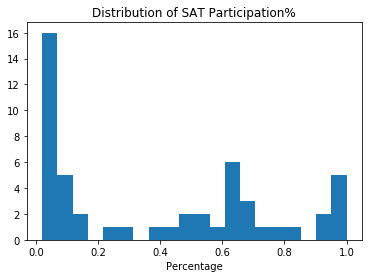

In [71]:
plt.hist(df_combined['Participation_sat'], bins=20);
plt.title('Distribution of SAT Participation%')
plt.xlabel('Percentage')


Text(0.5,0,'Percentage')

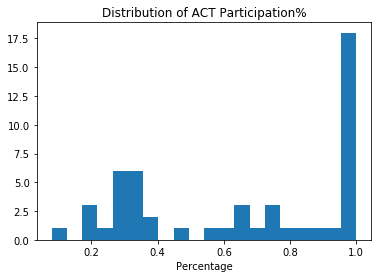

In [72]:
plt.hist(df_combined['Participation_act'], bins=20);
plt.title('Distribution of ACT Participation%')
plt.xlabel('Percentage')



##### 17. Plot the Math(s) distributions from both data sets.

Text(0.5,0,'Score')

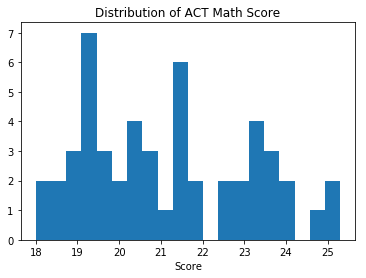

In [73]:
plt.hist(df_combined['Math_act'], bins=20);
plt.title('Distribution of ACT Math Score')
plt.xlabel('Score')


Text(0.5,0,'Score')

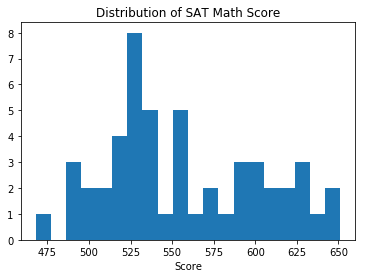

In [74]:
plt.hist(df_combined['Math_sat'], bins=20);
plt.title('Distribution of SAT Math Score')
plt.xlabel('Score')

##### 18. Plot the Verbal distributions from both data sets.

Text(0.5,0,'Score')

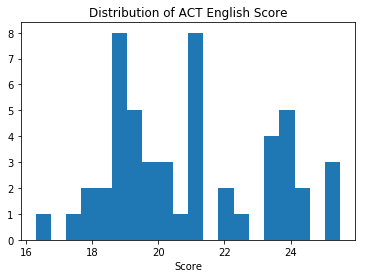

In [75]:
plt.hist(df_combined['English_act'], bins=20);
plt.title('Distribution of ACT English Score')
plt.xlabel('Score')

Text(0.5,0,'Score')

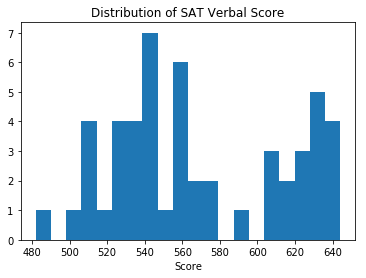

In [76]:
plt.hist(df_combined["Verbal_sat"], bins=20);
plt.title('Distribution of SAT Verbal Score')
plt.xlabel('Score')

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

That the data has normal distribution.

##### 20. Does this assumption hold true for any of our columns? Which?

No, the distribution of all of our variables were skewed.

##### 21. Plot some scatterplots examining relationships between all variables.

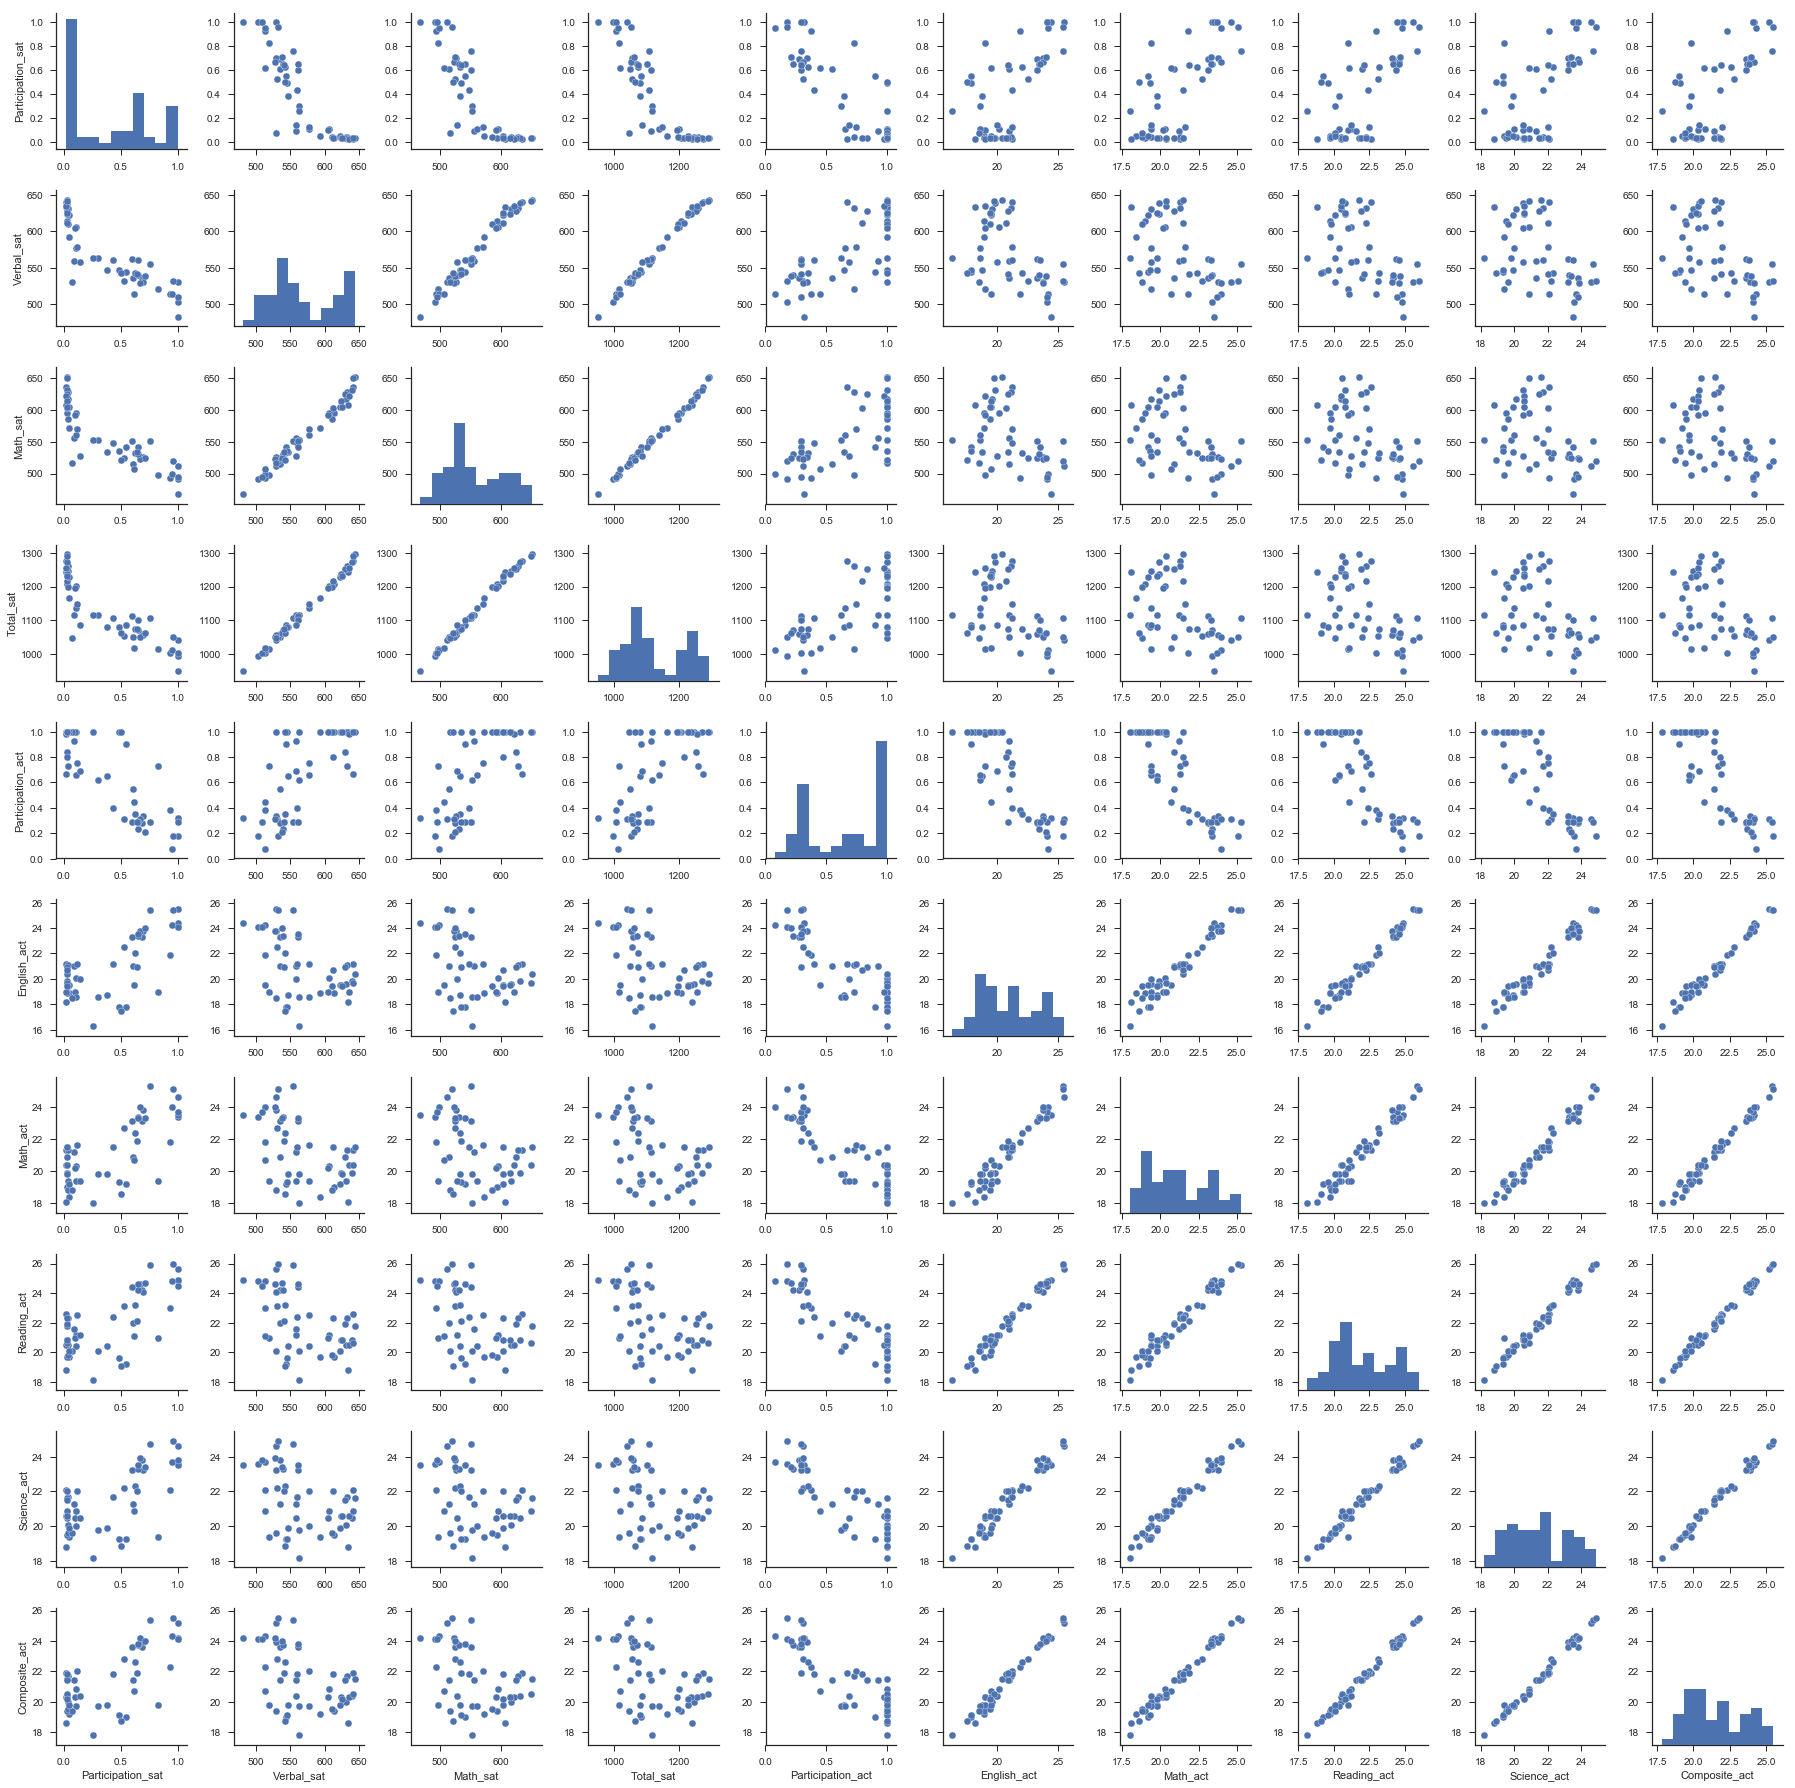

In [77]:
import seaborn as sns; 
sns.set(style='ticks', color_codes=True)

sns.pairplot(df_combined)

##### 22. Are there any interesting relationships to note?

Most ACT scroes have a high positive correlation. SAT scores also have a high positive correlation. 

##### 23. Create box plots for each variable. 

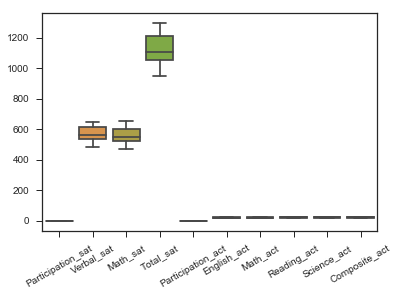

In [78]:
g = sns.boxplot(data=df_combined);
g.set_xticklabels(g.get_xticklabels(), rotation=30);

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

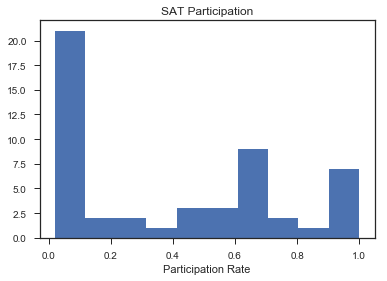

In [101]:
plt.hist(df_combined['Participation_sat']);
plt.title('SAT Participation');
plt.xlabel('Participation Rate');

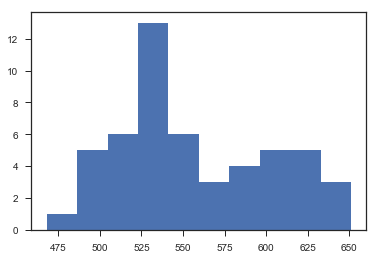

In [80]:
plt.hist(df_combined['Math_sat']);


The (mean, stdev) for Math_sat is (547.12, 84.91). The distribution is uneven and has a negative/left skew.plt.hist(df_combined['Participation_sat']);

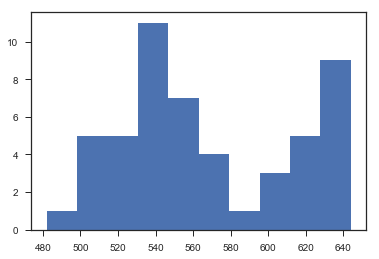

In [81]:
plt.hist(df_combined['Verbal_sat']);

The (mean, stdev) for Verbal_sat is (569.12,45,67). It has a bimodal distribution and due to the fact the mean > mode, it has a positive skew.

In [82]:
print(df_combined['Verbal_sat'].mode())
print(df_combined['Verbal_sat'].mean())

0    513.0
1    530.0
dtype: float64
569.1176470588235


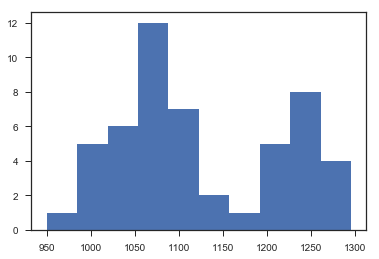

In [83]:
plt.hist(df_combined['Total_sat']);

In [84]:
print(df_combined['Total_sat'].mode())
print(df_combined['Total_sat'].mean())

0    1005.0
1    1052.0
2    1116.0
dtype: float64
1126.0980392156862


The (mean, stdev) for Total_sat is (1126.10, 92.49). The distribution is bimodal and because mean > mode it has a positive skew.

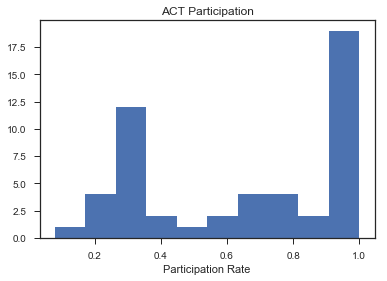

In [104]:
plt.hist(df_combined['Participation_act']);
plt.title('ACT Participation');
plt.xlabel('Participation Rate');

The (mean, stdev) of Participation_act is (65.25, 32.14). The distribution is uneven and it has a left/negitive skew.

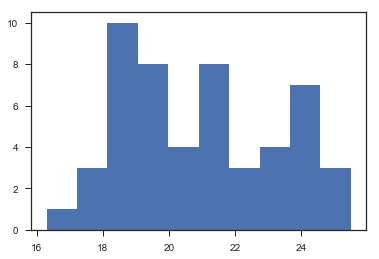

In [86]:
plt.hist(df_combined['English_act']);

In [87]:
print(df_combined['English_act'].mode())
print(df_combined['English_act'].mean())

0    19.0
1    19.5
2    21.2
dtype: float64
20.931372549019606


The (mean, stdev) for English_act is (20.93, 2.35). Because the mean > mode the distribution has a positive skew.

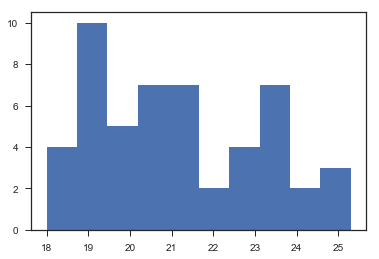

In [88]:
plt.hist(df_combined['Math_act']);

The (mean, stdev) for Math_act is (21.18, 1.98). Because Mean > Mode the distribution has a positive skew.

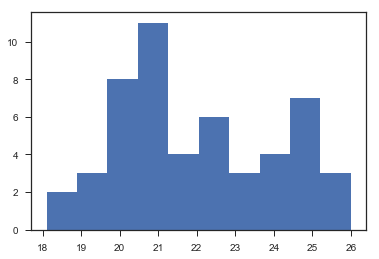

In [89]:
plt.hist(df_combined['Reading_act']);

In [90]:
print(df_combined['Reading_act'].mode())

0    20.1
1    20.8
dtype: float64


The (mean, stdev) for Reading_act is (22.01,2.07). Because mean > mode the distribution has a positive skew.

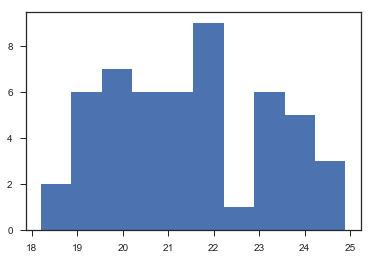

In [91]:
plt.hist(df_combined['Science_act']);

The (mean, stdev) of Science_act is (21.04, 3.18). The distribution is uneven and has a left/negitive skew.

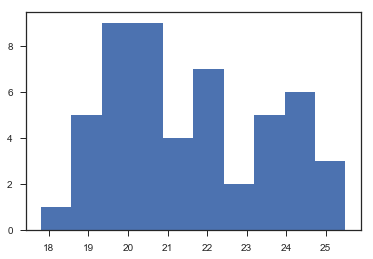

In [92]:
plt.hist(df_combined['Composite_act']);

In [93]:
print(df_combined['Composite_act'].mode())

0    19.8
1    20.3
2    21.4
dtype: float64


The (mean, stdev) of Composite_act is (21.52, 2.02). The mean > mode so the distribution is positively skewed.

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [94]:
# Ho: µ_p_sat = µ_p_act
# Ha: µ_p_sat != µ_p_act

In [95]:
p_act = df_combined['Participation_act']
p_sat = df_combined['Participation_sat']

stats.ttest_ind(p_act, p_sat)

Ttest_indResult(statistic=3.8085778908170544, pvalue=0.00024134203698662353)

Pvalue < Alpha so we must reject the null hypothesis and accept the alternative hypothesis

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [96]:
# SAT
stats.t.interval(0.95, 
                 len(p_sat)-1, 
                 loc = np.mean(p_sat), 
                 scale = np.std(p_sat, ddof = 1))


(-0.31051279537380627, 1.1065912267463553)

In [97]:
# ACT
stats.t.interval(0.95, 
                 len(p_act)-1, 
                 loc = np.mean(p_act), 
                 scale = np.std(p_act, ddof = 1))

(0.0069812093585757129, 1.2981168298571104)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, the intervals for SAT and ACT had different ranges.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

Its not necessarily inappropriate to generate the correlation. It may not me of much use since since the SATs and ACTs are scored in different scales.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

We can only make inferences on ACT and SAT Participation rates. We cannot make any inferences regarding SAT and ACT scores. 